In [23]:
import matplotlib.pyplot as pl
import numpy as np
import pandas as pd
from functions.plot_gradient import *
from functions_old.multi_gradient_descent import *
from math import log

In [24]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def fun(x,w,b):
    return sigmoid(np.dot(w,x) + b)

def cost(x,y,w,b):
    k = 0
    m = x.shape[0]
    for i in range(x.shape[0]):
        if y[i] ==1:
            k -= (1/m)*np.log(fun(x[i],w,b))
        if y[i] ==0:
            k -= (1/m)*(np.log(1-fun(x[i],w,b)))
    return k
def compute_gradient(x,y,w,b):
    lambda_ = 1
    dj_dw = np.zeros(x.shape[1])
    dj_db = 0
    for i in range(x.shape[0]):
        k = fun(x[i],w,b)-y[i]
        for j in range(x.shape[1]):
            dj_dw[j] += k*x[i][j]
        dj_db += k

# for refualrization
    for j in range(x.shape[1]):
        dj_dw[j] = dj_dw[j]/x.shape[0] + (lambda_/x.shape[0]) * w[j]
    return dj_dw/x.shape[0],dj_db/x.shape[0]

def logistic_descent(x,y,alpha = 0.01,iter =10000 ):
    w = np.zeros(x.shape[1])
    b =0
    for i in range(iter):
    
        dj_dw,dj_db = compute_gradient(x,y,w,b)

        w = w - alpha*dj_dw
        b = b- alpha*dj_db
        if i%100 ==0:
            # print(w,b,"-------------------------------- cost: ",cost(x,y,w,b))
            print("itreation: ",i,"-------------------------------- cost: ",cost(x,y,w,b))
            pass
    return w,b





In [25]:
def map_feature(X1, X2,degree=6):
    """
    Feature mapping function to polynomial features    
    """
    X1 = np.atleast_1d(X1)
    X2 = np.atleast_1d(X2)
    # degree = 6
    out = []
    for i in range(1, degree+1):
        for j in range(i + 1):
            out.append((X1**(i-j) * (X2**j)))
    return np.stack(out, axis=1)

In [26]:
data = np.loadtxt("C:\code\ml\Coursera\material\C1 - Supervised Machine Learning - Regression and Classification\week3\C1W3A1\data\ex2data2.txt",delimiter = ',')
x_train = data[:,:2]
y_train = data[:,2]
# x_train = np.array([[x,y,x**2,y**2] for x,y in list(x_train)])
# x_train = np.c_[x_train[:,0],x_train[:,1],x_train[:,0]**2,x_train[:,1]**2,x_train[:,0]**3,x_train[:,1]**3]
x_train = map_feature(x_train[:,0],x_train[:,1])
print(x_train)
y_train

[[ 5.12670000e-02  6.99560000e-01  2.62830529e-03 ...  6.29470940e-04
   8.58939846e-03  1.17205992e-01]
 [-9.27420000e-02  6.84940000e-01  8.60107856e-03 ...  1.89305413e-03
  -1.39810280e-02  1.03255971e-01]
 [-2.13710000e-01  6.92250000e-01  4.56719641e-02 ...  1.04882142e-02
  -3.39734512e-02  1.10046893e-01]
 ...
 [-4.84450000e-01  9.99270000e-01  2.34691802e-01 ...  2.34007252e-01
  -4.82684337e-01  9.95627986e-01]
 [-6.33640000e-03  9.99270000e-01  4.01499650e-05 ...  4.00328554e-05
  -6.31330588e-03  9.95627986e-01]
 [ 6.32650000e-01 -3.06120000e-02  4.00246023e-01 ...  3.51474517e-07
  -1.70067777e-08  8.22905998e-10]]


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

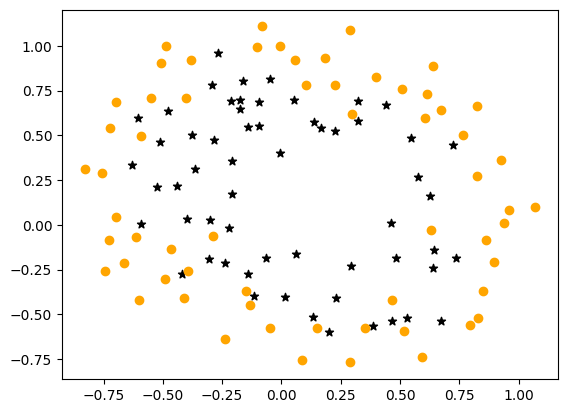

In [27]:
for i in range(y_train.shape[0]):
    if y_train[i] == 1:
        pl.scatter(x_train[i,0], x_train[i,1],marker='*',color='black')
    else:
        pl.scatter(x_train[i,0], x_train[i,1],marker='o',color= 'orange')
        
pl.show()

In [28]:

X = feature_scaling(x_train)
# y_train = feature_scaling(y_train)

In [29]:
per_w,per_b = logistic_descent(X,y_train,10,2500)
print(per_w,per_b)

itreation:  0 -------------------------------- cost:  0.6925329427857453
itreation:  100 -------------------------------- cost:  0.9678468309181226
itreation:  200 -------------------------------- cost:  0.8855457913714754
itreation:  300 -------------------------------- cost:  0.8158924868545386
itreation:  400 -------------------------------- cost:  0.761013552527872
itreation:  500 -------------------------------- cost:  0.7188939364712114
itreation:  600 -------------------------------- cost:  0.6867622313228398
itreation:  700 -------------------------------- cost:  0.6621358553443164
itreation:  800 -------------------------------- cost:  0.643053715918998
itreation:  900 -------------------------------- cost:  0.6280538093303197
itreation:  1000 -------------------------------- cost:  0.6160765849233093
itreation:  1100 -------------------------------- cost:  0.6063627281041031
itreation:  1200 -------------------------------- cost:  0.5983684244188822
itreation:  1300 ---------

In [30]:
def predict(X, w, b): 
    m, n = X.shape   
    p = np.zeros(m)
    for i in range(m):   
        z_wb = np.dot(X[i],w) 
        for j in range(n): 
            z_wb += 0
        z_wb += b
        
        f_wb = sigmoid(z_wb)

        p[i] = 1 if f_wb>0.5 else 0
        
    return p

In [31]:
pred = predict(X,per_w,per_b)
print('Train Accuracy: %f'%(np.mean(pred == y_train) * 100))

Train Accuracy: 70.338983


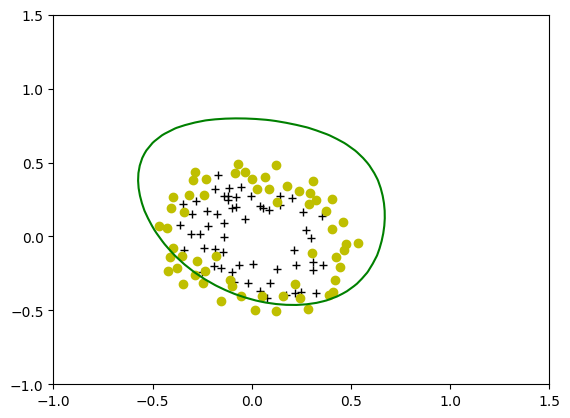

In [32]:
plot_decision_boundary(per_w,per_b,X,y_train)

In [33]:
# for i in range(y_train.shape[0]):
#     if y_train[i] == 1:
#         pl.scatter(x_train[i,0], x_train[i,1],marker='*',color='black')
#     else:
#         pl.scatter(x_train[i,0], x_train[i,1],marker='o',color= 'orange')
        

# x1 = np.linspace(-1, 1.5, 50)
# x2 = np.linspace(-1, 1.5, 50)
# for i in range(x1.shape[0]):
#     for j in range(x2.shape[0]):
#         k = np.dot(map_feature(x1[i],x2[j])[0],per_w) +per_b
#         if int(k) == 0:
#             print(k)
#             pl.scatter(x1[i],x2[j],color='blue')
# pl.show()